In [167]:
import os
from p1_uml_util import *
import seaborn as sns
import matplotlib.pyplot as plt

# Parte B
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import silhouette_score

# Parte C
from sklearn.ensemble import IsolationForest

# Parte D
from sklearn.decomposition import PCA



In [168]:
def prepare_data():
    script_path = script_path = os.getcwd()
    data_path = os.path.join(script_path, "data")
    file_path = os.path.join(data_path, "data.csv")
    _df = read_csv_file(file_path)
    # _df.set_index(lb_timestamp, inplace=True)
    print(_df.dtypes)
    return _df

In [169]:
def plot_data(_df: pd.DataFrame, lb1, lb2, legend):
    import matplotlib.pyplot as plt
    df_to_plot = _df.tail(1000)
    plt.plot(df_to_plot.index, df_to_plot[lb1], label=alias[lb_V005_vent01_CO2])
    plt.plot(df_to_plot.index, df_to_plot[lb2], label=alias[lb_V022_vent02_CO2])
    plt.xlabel(lb_timestamp)
    plt.ylabel(legend)
    plt.legend()
    plt.show()

timestamp                object
V005_vent01_CO2         float64
V022_vent02_CO2         float64
V006_vent01_temp_out    float64
V023_vent02_temp_out    float64
dtype: object
              timestamp  V005_vent01_CO2  V022_vent02_CO2  \
0      23.06.2012 01:00       494.172532       405.514287   
1      23.06.2012 02:00       491.992574       404.705170   
2      23.06.2012 03:00       490.003467       401.981443   
3      23.06.2012 04:00       490.972327       402.471192   
4      23.06.2012 05:00       489.132106       403.174487   
...                 ...              ...              ...   
25937  08.06.2015 19:00       624.063257       533.007180   
25938  08.06.2015 20:00       621.028671       523.581086   
25939  08.06.2015 21:00       617.569761       518.422520   
25940  08.06.2015 22:00       615.949610       516.342616   
25941  08.06.2015 23:00       613.708765       512.382790   

       V006_vent01_temp_out  V023_vent02_temp_out  
0                 22.700000             2

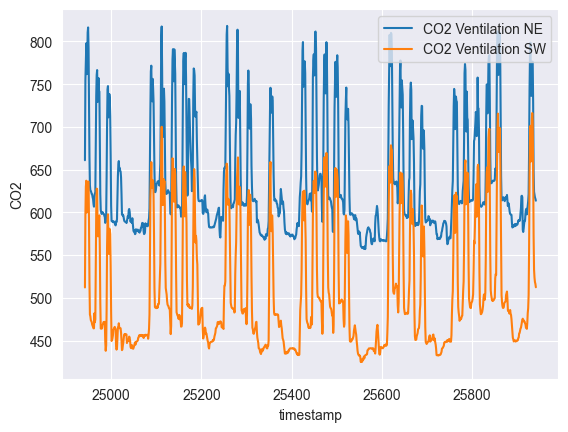

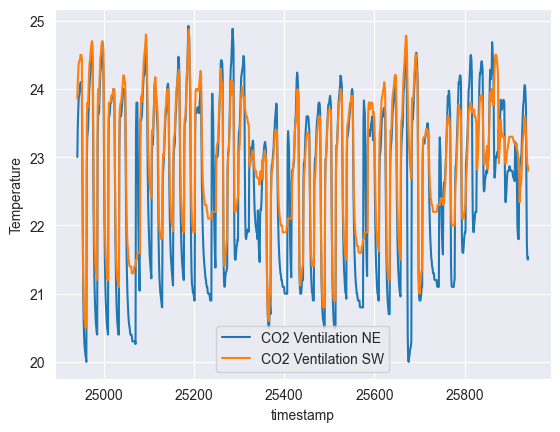

In [170]:
if __name__ == "__main__":
    df = prepare_data()
    print(df)
    plot_data(df, lb_V005_vent01_CO2, lb_V022_vent02_CO2, "CO2")
    plot_data(df, lb_V006_vent01_temp_out, lb_V023_vent02_temp_out, "Temperature")

In [171]:
df.describe()

,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out
count,25942.000000,25942.000000,25941.000000,25941.000000
mean,651.744240,497.431146,21.345815,21.876474
std,101.078259,75.843643,2.219332,1.954422
min,448.086428,362.612365,0.000000,6.749889
25%,580.649750,440.735256,20.100000,21.000000
50%,620.179955,472.686925,22.084667,22.330583
75%,709.237826,543.404515,22.934306,23.231082
max,1369.095839,853.762769,26.886944,27.200000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25942 entries, 0 to 25941
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             25942 non-null  object 
 1   V005_vent01_CO2       25942 non-null  float64
 2   V022_vent02_CO2       25942 non-null  float64
 3   V006_vent01_temp_out  25941 non-null  float64
 4   V023_vent02_temp_out  25941 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1013.5+ KB


In [173]:
# Eliminar filas con NaN
df_cleaned = df.dropna()

In [174]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25941 entries, 0 to 25941
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             25941 non-null  object 
 1   V005_vent01_CO2       25941 non-null  float64
 2   V022_vent02_CO2       25941 non-null  float64
 3   V006_vent01_temp_out  25941 non-null  float64
 4   V023_vent02_temp_out  25941 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [175]:
# Variables con las que se trabajará
variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']

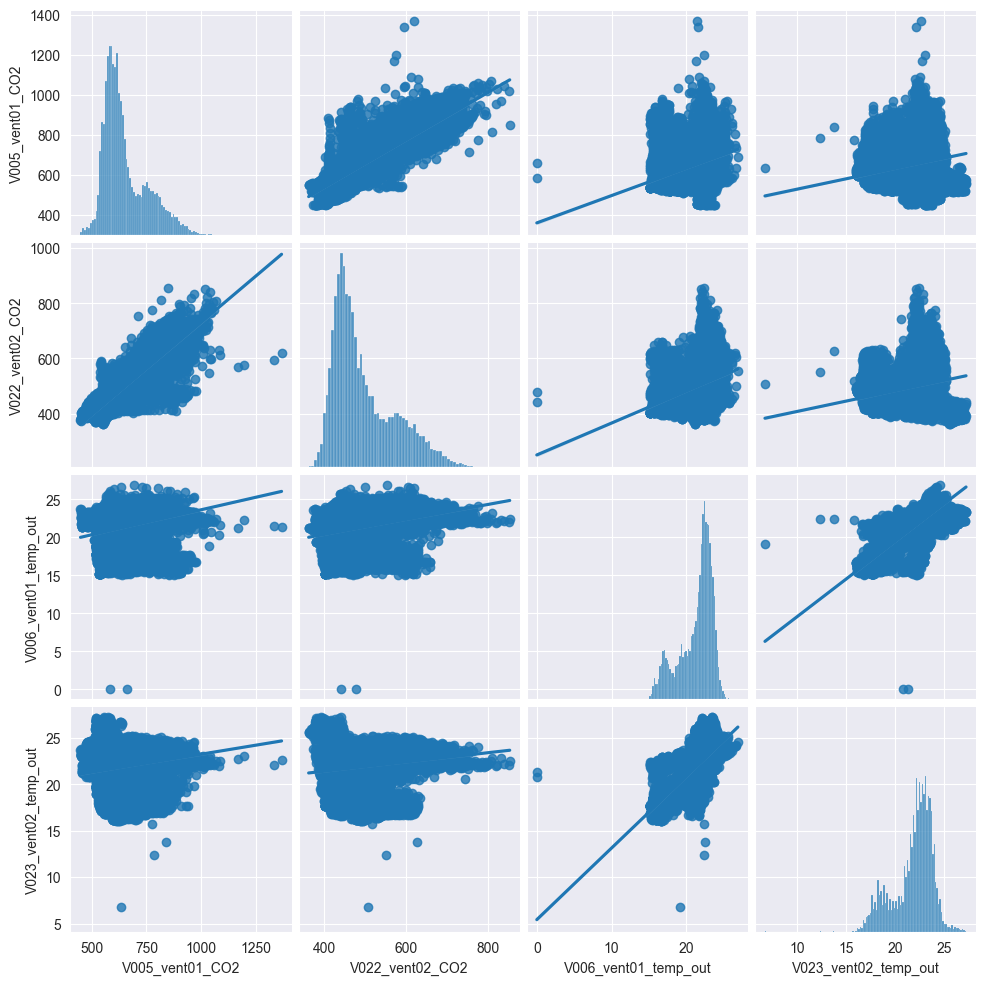

In [176]:
sns.pairplot(df_cleaned[variables], kind = 'reg', vars = variables)

## LITERAL A

In [177]:
# Se convierte la columna timestamp a formato de fecha y hora 
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
# Se crea una columna ''day' que contiene solo la fecha (sin hora)
df_cleaned['day'] = df_cleaned['timestamp'].dt.date
# Se extrae la hora del día para cada registro, creando una columna 'hour' que contiene solo la hora (sin fecha)
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
print (df_cleaned['day'])
print (df_cleaned['hour'])
print(df_cleaned)

# # Variables con las que se trabajará
# variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']

# Se define una paleta de 24 colores diferentes (uno para cada hora) 
palette = sns.color_palette('Spectral', n_colors = 24) 

# Generar gráficos de boxplot por cada variable
def plot_variables_per_day(df_data, variables):
    for var in variables:
        plt.figure(figsize = (12, 6))
        sns.set_style("darkgrid")  # Fondo gris con grid
        sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})
        plt.title(f'Boxplot de {var} por hora del día')
        plt.xlabel('Hora del día')
        plt.ylabel(var)
        plt.xticks(range(0, 24))  # Asegurarse de que las horas estén de 0 a 23
        plt.show()


0        2012-06-23
1        2012-06-23
2        2012-06-23
3        2012-06-23
4        2012-06-23
            ...    
25937    2015-06-08
25938    2015-06-08
25939    2015-06-08
25940    2015-06-08
25941    2015-06-08
Name: day, Length: 25941, dtype: object
0         1
1         2
2         3
3         4
4         5
         ..
25937    19
25938    20
25939    21
25940    22
25941    23
Name: hour, Length: 25941, dtype: int32
                timestamp  V005_vent01_CO2  V022_vent02_CO2  \
0     2012-06-23 01:00:00       494.172532       405.514287   
1     2012-06-23 02:00:00       491.992574       404.705170   
2     2012-06-23 03:00:00       490.003467       401.981443   
3     2012-06-23 04:00:00       490.972327       402.471192   
4     2012-06-23 05:00:00       489.132106       403.174487   
...                   ...              ...              ...   
25937 2015-06-08 19:00:00       624.063257       533.007180   
25938 2015-06-08 20:00:00       621.028671       523.581086   
2

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


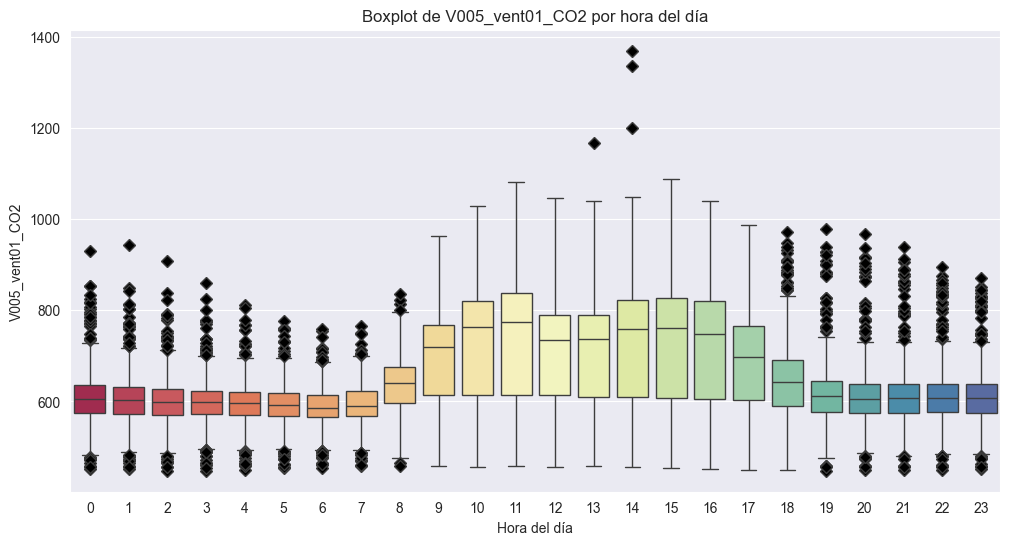

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


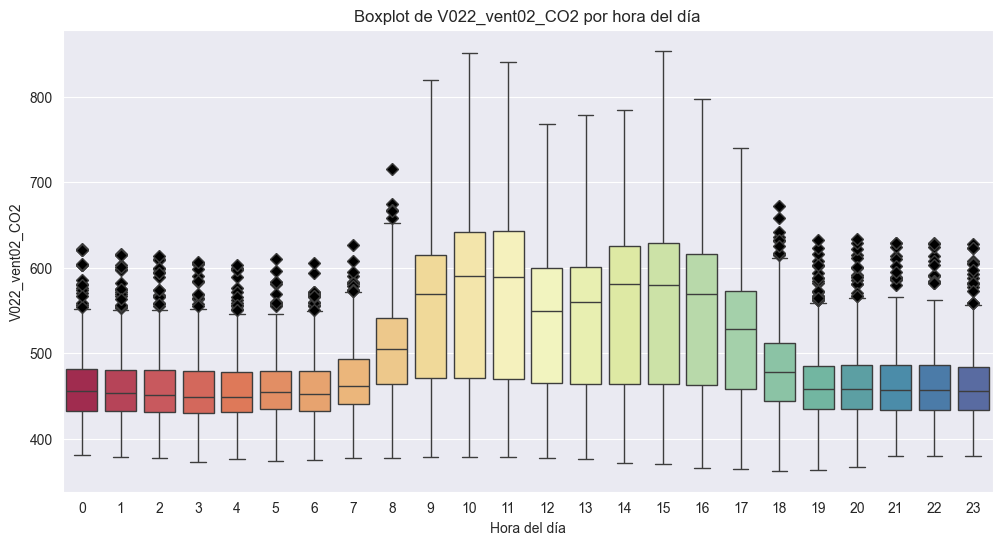

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


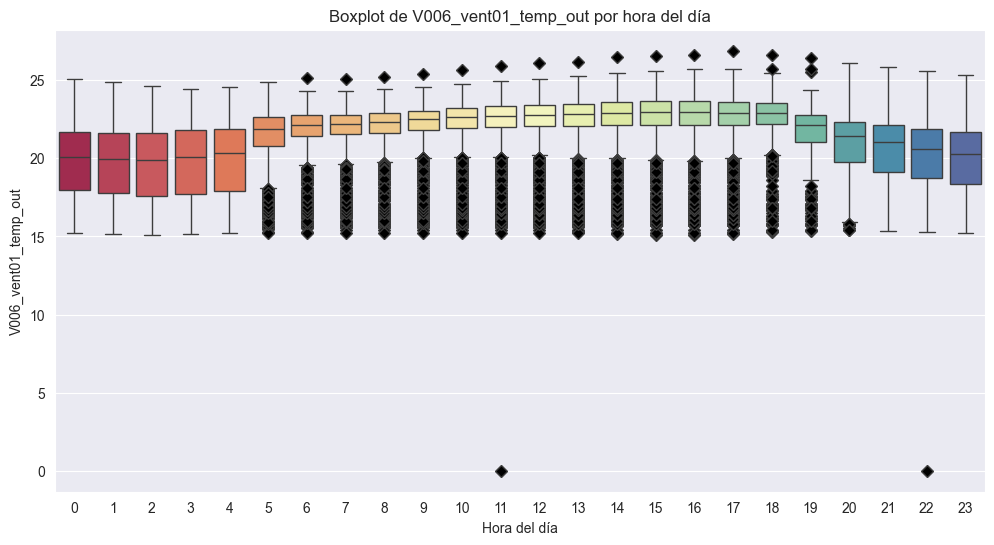

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1761737955.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


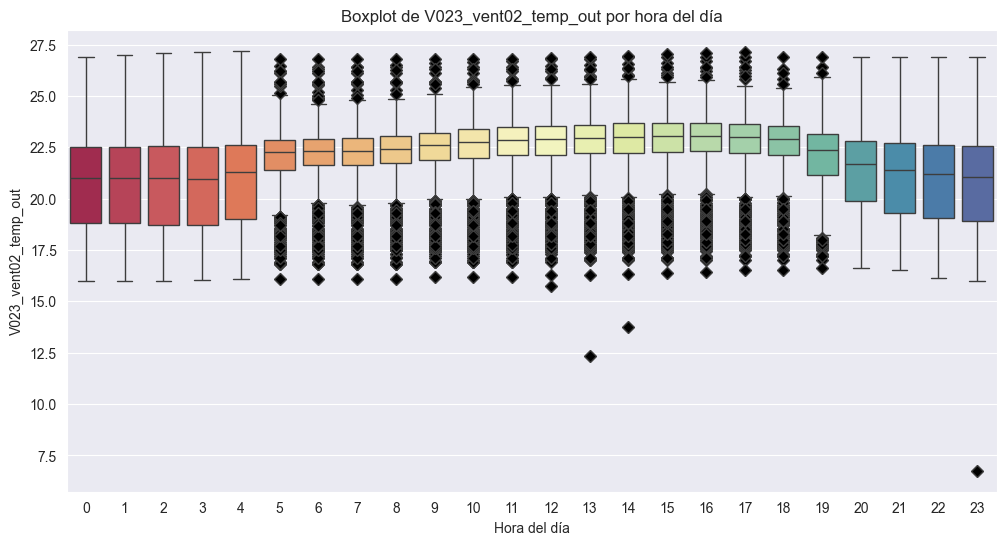

In [178]:
plot_variables_per_day(df_cleaned, variables)

## LITERAL B

In [179]:
# Se normalizan los datos para el análisis de clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[variables])
scaled_data

array([[-1.558955  , -1.21196732,  0.61018861,  0.80511209],
       [-1.58052228, -1.22263567,  0.61018861,  0.77954279],
       [-1.60020138, -1.25854844,  0.57794606,  0.77954279],
       ...,
       [-0.33813246,  0.27674595,  0.08329328,  0.52371543],
       [-0.35416133,  0.24932209,  0.06947505,  0.50723484],
       [-0.37633098,  0.19711114,  0.08462838,  0.47254075]])

In [180]:
type(scaled_data)

numpy.ndarray

In [181]:
nan_in_array = np.isnan(scaled_data).any()
nan_in_array

False

### Método 1: K-Means

In [182]:
 # K-Means clustering
def kmeans_clustering(scaled_data):
    kmeans = KMeans(n_clusters = 3)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    return kmeans_labels

In [183]:
# Se obtiene el array de etiquetas utilizando K-Means como método de clustering
LABELS_KMEANS = kmeans_clustering(scaled_data)

# Se obtiene los valores únicos de etiqueta
valores_unicos_kmeans = np.unique(LABELS_KMEANS)

# Se cuenta el número de valores únicos
num_valores_unicos_kmeans = len(valores_unicos_kmeans)

print(f'Tenemos {num_valores_unicos_kmeans} etiquetas diferentes que son: {valores_unicos_kmeans}')

Tenemos 3 etiquetas diferentes que son: [0 1 2]


In [184]:
# Se agregan los resultados de K-Means clustering al dataframe
df_cleaned['K-Means_cluster'] = LABELS_KMEANS
df_cleaned

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/1421822651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['K-Means_cluster'] = LABELS_KMEANS


,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,day,hour,K-Means_cluster
0,2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,2012-06-23,1,1
1,2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,2012-06-23,2,1
2,2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,2012-06-23,3,1
3,2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,2012-06-23,4,1
4,2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,2012-06-23,5,1
...,...,...,...,...,...,...,...,...
25937,2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,2015-06-08,19,1
25938,2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,2015-06-08,20,1
25939,2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,2015-06-08,21,1
25940,2015-06-08 22:00:00,615.949610,516.342616,21.500000,22.867806,2015-06-08,22,1


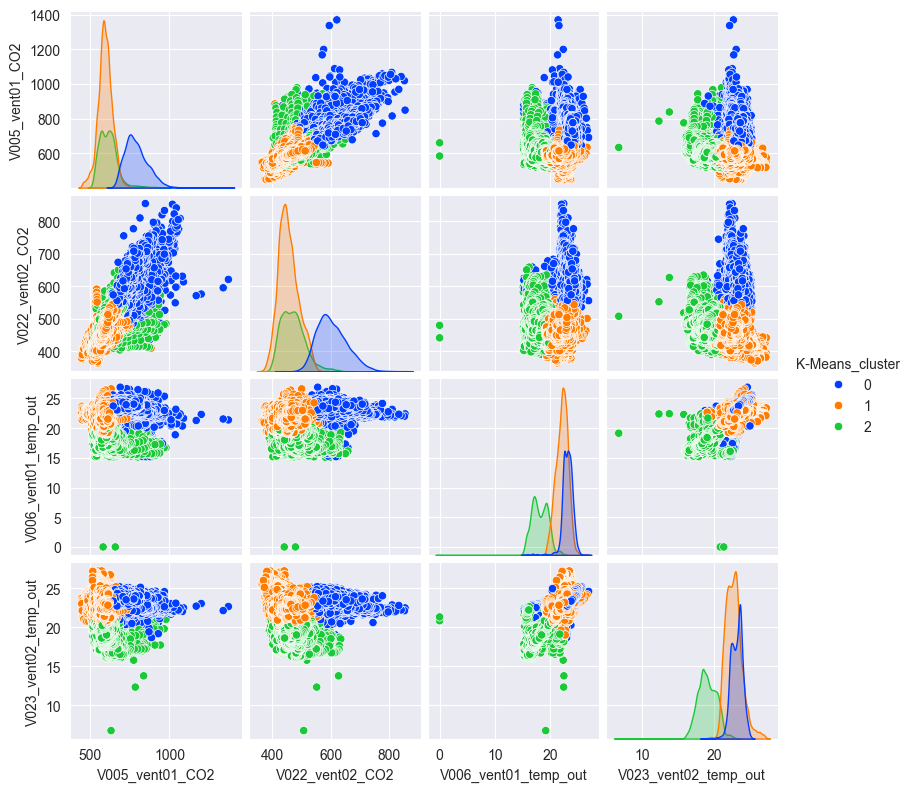

In [190]:
sns.pairplot(df_cleaned, hue = 'K-Means_cluster', height = 2, vars = variables, palette = 'bright')

In [191]:
# # Gráfico de los patrones detectados por K-Means
# for var in variables:
#     plt.figure(figsize = (12, 6))
#     sns.set_style('darkgrid') 
#     sns.boxplot(x = 'hour', y = var, hue = 'K-Means_cluster', data = df_cleaned, palette = 'Set2')
#     plt.title(f'Patrones diarios de {var} detectados por K-Means')
#     plt.xlabel('Hora del día')
#     plt.ylabel(var)
#     plt.show()

#### En el código de K-Means se escogió un número de clusters igual a 3. Para determinar el número ideal de clusters, vamos a utilizar el índice de silueta, el cual evalúa qué tan bien separadas están las muestras dentro de sus clusters. Un valor más cercano a 1 indica que la separación es mejor.

In [153]:
# Se calcula la métrica índice de silueta para varios valores de k
silhouette_scores_dict= {}
for k in range(2, 12):
    kmeans_prueba = KMeans(n_clusters = k, random_state = 42)
    kmeans_labels_prueba = kmeans_prueba.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans_labels_prueba)
    silhouette_scores_dict[k] = silhouette_avg
    print(f'k: {k} -> índice de silueta: {silhouette_avg:.3f}')
best_k = max(silhouette_scores_dict, key = silhouette_scores_dict.get)    
print(f'Mejor número de clusters: {best_k}')    


k: 2 -> índice de silueta: 0.360
k: 3 -> índice de silueta: 0.478
k: 4 -> índice de silueta: 0.373
k: 5 -> índice de silueta: 0.328
k: 6 -> índice de silueta: 0.302
k: 7 -> índice de silueta: 0.290
k: 8 -> índice de silueta: 0.275
k: 9 -> índice de silueta: 0.264
k: 10 -> índice de silueta: 0.266
k: 11 -> índice de silueta: 0.256
Mejor número de clusters: 3


### Método 2: DBSCAN

In [141]:
# DBSCAN clustering
def dbscan_clustering(scaled_data):
    dbscan = DBSCAN(eps = 0.5, min_samples = 15)
    dbscan_labels = dbscan.fit_predict(scaled_data)


    return dbscan_labels

In [142]:
# Se obtiene el array de etiquetas utilizando DBSCAN como método de clustering
LABELS_DBSCAN = dbscan_clustering(scaled_data)

# Se obtiene los valores únicos de etiqueta
valores_unicos_dbscan = np.unique(LABELS_DBSCAN)

# Se cuenta el número de valores únicos
num_valores_unicos_dbscan = len(valores_unicos_dbscan)

print(f'Tenemos {num_valores_unicos_dbscan} etiquetas diferentes que son: {valores_unicos_dbscan}')

Tenemos 3 etiquetas diferentes que son: [-1  0  1]


In [143]:
# Se agregan los resultados de K-Means clustering al dataframe
df_cleaned['K-DBSCAN'] = LABELS_DBSCAN

/var/folders/m5/8m1_pdqs61x8nd2sgc55km180000gn/T/ipykernel_1139/3611525307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['K-DBSCAN'] = LABELS_DBSCAN


### Método 3: GMM (Modelo de mezclas gaussianas)

In [159]:
# GMM clustering
def gmm_clustering(scaled_data):
    gmm = GaussianMixture(n_components = 3, random_state = 42)
    gmm_labels = gmm.fit_predict(scaled_data)

    return gmm_labels

In [158]:
# Se obtiene el array de etiquetas utilizando DBSCAN como método de clustering
LABELS_GMM = gmm_clustering(scaled_data)

# Se obtiene los valores únicos de etiqueta
valores_unicos_gmm = np.unique(LABELS_GMM)

# Se cuenta el número de valores únicos
num_valores_unicos_gmm = len(valores_unicos_gmm)

print(f'Tenemos {num_valores_unicos_gmm} etiquetas diferentes que son: {valores_unicos_gmm}')

Tenemos 4 etiquetas diferentes que son: [0 1 2 3]


## LITERAL C

In [ ]:
# Detección de anomalías univariable (Isolation Forest)
def detect_anomalies(data):
    isolation_forest = IsolationForest(contamination=0.05)
    anomaly_labels = isolation_forest.fit_predict(scaled_data)
    return anomaly_labels


In [ ]:
data['Anomalies'] = detect_anomalies(scaled_data)

In [ ]:
# Graficar las anomalías detectadas
def plot_anomalies(data, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        plt.plot(data['timestamp'], data[var], label=var)
        anomalies = data[data['Anomalies'] == -1]
        plt.scatter(anomalies['timestamp'], anomalies[var], color='red', label='Anomalías', zorder=5)
        plt.title(f'Anomalías detectadas en {var}')
        plt.xlabel('Fecha')
        plt.ylabel(var)
        plt.legend()
        plt.show()

In [ ]:
plot_anomalies(data, variables)

## LITERAL D

In [ ]:
# Análisis multivariable (PCA para reducir la dimensionalidad)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
